In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_24.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4761,34.0970,20.2,282.0,2022-10-31 01:44:32.801828,2022-10-30 16:41:25,2022-10-30 01:55:08,under way using engine,235.557924,529.149365
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.4315,34.1047,20.2,282.0,2022-10-31 01:49:35.660712,2022-10-30 16:48:08,2022-10-30 01:55:08,under way using engine,238.931185,536.726944
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3895,34.1077,20.2,271.0,2022-10-31 01:54:38.504486,2022-10-30 16:54:25,2022-10-30 01:55:08,under way using engine,242.321724,544.343338
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3598,34.1082,20.1,271.0,2022-10-31 01:59:42.326869,2022-10-30 16:58:50,2022-10-30 01:55:08,under way using engine,244.800071,545.915560
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:00:00,126.3213,34.1087,20.2,271.0,2022-10-31 02:04:44.283430,2022-10-30 17:04:31,2022-10-30 01:55:08,under way using engine,248.026798,557.159024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8247,35.0773,0.0,91.0,2022-11-04 20:13:03.886599,2022-11-04 11:09:51,2022-11-04 11:07:05,under way using engine,11.985248,NaN
474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8246,35.0772,0.0,91.0,2022-11-04 20:18:07.878970,2022-11-04 11:15:24,2022-11-04 11:07:05,under way using engine,11.973778,NaN
475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0774,0.1,91.0,2022-11-04 20:58:30.521894,2022-11-04 11:57:20,2022-11-04 11:49:08,under way using engine,11.997099,957.274033
476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0775,0.0,91.0,2022-11-04 21:03:31.914746,2022-11-04 12:00:35,2022-11-04 12:01:08,under way using engine,12.008209,NaN


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

167


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1389.7275616339807

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

69.48637808169903

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

71.47502926460479
92.63554206974845
70.68339235807801
71.76136468162034
70.47998578851839
72.73619273463741
71.75691316733956
364.50345334869
69.56547832525294
122.88065331177407
77.68106582521884
71.26678008532123
70.46477786458458
70.80277605809016
21.03415675050134


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.141176470588237
1 14.822222222222223
2 13.670000000000002
3 13.4
4 14.338095238095239
5 13.54375
6 13.335714285714285
7 12.75
8 12.31111111111111
9 11.855263157894736
10 13.41111111111111
11 12.399999999999999
12 12.51388888888889
13 8.313157894736841
14 4.645


In [19]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-11-02 09:18:39.641081
부산 도착 시각 2022-11-04 21:18:40.519903


In [20]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_20.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 8:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


59


In [21]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [22]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [23]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [24]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,59,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.6448,38.7996,9.4,104.0,2022-09-30 23:00:41.873653,2022-09-30 13:55:21,2022-09-30 01:37:07,under way using engine,999.329431,1248.920210
1,60,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.8027,38.7914,9.4,93.0,2022-09-30 23:30:45.247203,2022-09-30 14:20:30,2022-09-30 02:13:08,under way using engine,986.319121,1232.660467
2,61,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.9141,38.7934,9.2,96.0,2022-10-01 00:01:08.988141,2022-09-30 14:56:28,2022-09-30 02:49:08,under way using engine,977.489504,1223.165075
3,62,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.0021,38.7842,8.7,108.0,2022-10-01 00:30:50.401793,2022-09-30 15:22:00,2022-09-30 03:01:09,under way using engine,970.062241,1222.831812
4,63,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.1093,38.7560,8.2,105.0,2022-10-01 01:00:53.259956,2022-09-30 15:59:42,2022-09-30 03:37:07,under way using engine,960.281513,1227.388613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487
186,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0773,0.1,91.0,2022-10-05 03:40:24.322710,2022-10-04 18:39:15,2022-10-04 06:25:09,moored,11.986756,956.448815


In [25]:
stop_index = check_ATA(sample)

In [26]:
stop_index

176

In [27]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
176,235,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.9017,34.8713,13.6,310.0,2022-10-04 19:09:35.172588,2022-10-04 10:08:33,2022-10-04 10:01:07,under way using engine,13.255617,18.901258
177,236,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8445,34.9367,13.1,330.0,2022-10-04 19:39:37.994914,2022-10-04 10:29:54,2022-10-04 10:37:05,under way using engine,4.312237,5.984210
178,237,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8077,34.9980,8.2,337.0,2022-10-04 20:09:40.578791,2022-10-04 11:02:14,2022-10-04 10:55:07,under way using engine,3.334440,4.261931
179,238,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8012,35.0699,7.2,70.0,2022-10-04 20:39:44.266916,2022-10-04 11:34:12,2022-10-04 11:19:08,under way using engine,11.276009,15.148545
180,239,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0775,0.0,91.0,2022-10-04 21:39:49.189278,2022-10-04 12:39:13,2022-10-04 12:37:09,moored,12.008588,NaN
181,240,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0774,0.1,91.0,2022-10-04 22:09:52.793922,2022-10-04 13:00:17,2022-10-04 01:07:05,moored,11.997866,957.335246
182,241,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8254,35.0771,0.1,91.0,2022-10-04 22:39:55.350680,2022-10-04 13:33:13,2022-10-04 01:31:07,moored,11.965744,954.772172
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487


In [28]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-10-04 19:09:35.172588')

# 감속률 적용

In [29]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [30]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-03 16:40:39.986288,2022-10-04 19:09:35.172588,1 days 02:28:55.186300
21,80,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.7434,38.5786,13.5,102.0,2022-10-01 09:31:42.894382,2022-10-01 00:23:07,2022-09-30 11:55:11,under way using engine,823.219759,1167.289195,2022-10-03 10:59:42.894382,2022-10-04 19:09:35.172588,1 days 08:09:52.278206
22,81,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.8949,38.5366,19.4,107.0,2022-10-01 10:01:44.661562,2022-10-01 00:50:33,2022-10-01 12:49:05,under way using engine,809.355773,1714.957759,2022-10-02 20:23:44.661562,2022-10-04 19:09:35.172588,1 days 22:45:50.511026
23,82,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.0784,38.4828,14.2,113.0,2022-10-01 10:31:47.135327,2022-10-01 01:23:40,2022-10-01 01:31:09,under way using engine,792.414860,1170.234717,2022-10-03 09:33:47.135327,2022-10-04 19:09:35.172588,1 days 09:35:48.037261
24,83,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.2087,38.4376,12.9,115.0,2022-10-01 11:01:50.126019,2022-10-01 01:54:15,2022-10-01 01:55:09,under way using engine,780.027173,1071.427728,2022-10-03 09:09:50.126019,2022-10-04 19:09:35.172588,1 days 09:59:45.046569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,147.954666,2022-10-05 17:29:21.070551,2022-10-04 19:09:35.172588,0 days 22:19:45.897963
172,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,289.085158,2022-10-06 19:28:25.539071,2022-10-04 19:09:35.172588,2 days 00:18:50.366483
173,232,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,227.167731,2022-10-06 09:53:27.899400,2022-10-04 19:09:35.172588,1 days 14:43:52.726812
174,233,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,121.543658,2022-10-05 16:30:30.569093,2022-10-04 19:09:35.172588,0 days 21:20:55.396505


In [31]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [32]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [33]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [34]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [35]:
ddd["error"].max()

Timedelta('115 days 09:08:48.574443')

In [36]:
ddd["error"].mean()

Timedelta('4 days 05:48:15.473371038')

In [37]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
168,227,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0444,34.8247,7.6,151.0,2022-10-04 13:09:01.327977,2022-10-04 04:06:04,2022-10-04 03:49:05,under way using engine,26.086101,2022-10-04 18:26:01.327977,2022-10-04 19:09:35.172588,0 days 00:43:33.844611,0 days 09:09:35.172588
134,193,COSCO FOS,KRBNP,2022-10-04 08:00:00,126.0742,34.0336,11.7,91.0,2022-10-03 19:07:16.279586,2022-10-03 10:06:34,2022-10-02 12:13:06,under way using engine,272.232959,2022-10-04 17:40:16.279586,2022-10-04 19:09:35.172588,0 days 01:29:18.893002,0 days 11:09:35.172588
164,223,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0290,34.8269,6.4,207.0,2022-10-04 11:08:53.837091,2022-10-04 02:07:18,2022-10-04 02:01:08,under way using engine,24.839431,2022-10-04 17:25:53.837091,2022-10-04 19:09:35.172588,0 days 01:43:41.335497,0 days 09:09:35.172588
159,218,COSCO FOS,KRBNP,2022-10-04 08:00:00,128.9394,34.8124,3.0,257.0,2022-10-04 08:08:32.098003,2022-10-03 23:03:47,2022-10-03 11:07:07,under way using engine,20.621223,2022-10-04 21:32:32.098003,2022-10-04 19:09:35.172588,0 days 02:22:56.925415,0 days 11:09:35.172588
133,192,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.9682,34.0638,11.9,96.0,2022-10-03 18:37:12.982441,2022-10-03 09:36:34,2022-10-02 12:13:06,under way using engine,279.962836,2022-10-04 16:46:12.982441,2022-10-04 19:09:35.172588,0 days 02:23:22.190147,0 days 11:09:35.172588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,172,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3948,35.1330,0.3,264.0,2022-10-03 08:36:14.543227,2022-10-02 23:35:24,2022-10-02 12:13:06,under way using engine,312.254365,2022-11-11 06:39:14.543227,2022-10-04 19:09:35.172588,37 days 11:29:39.370639,0 days 11:09:35.172588
114,173,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3977,35.1340,0.3,255.0,2022-10-03 09:06:20.649953,2022-10-03 00:05:53,2022-10-02 12:13:06,under way using engine,311.995457,2022-11-11 07:09:20.649953,2022-10-04 19:09:35.172588,37 days 11:59:45.477365,0 days 11:09:35.172588
73,132,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.0727,34.9816,0.2,231.0,2022-10-02 12:04:14.894538,2022-10-02 02:35:44,2022-10-02 12:13:06,under way using engine,341.359610,2022-11-29 21:08:14.894538,2022-10-04 19:09:35.172588,56 days 01:58:39.721950,0 days 11:09:35.172588
115,174,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.4004,35.1347,0.2,239.0,2022-10-03 09:40:13.803859,2022-10-03 00:39:54,2022-10-02 12:13:06,under way using engine,311.753380,2022-11-30 18:44:13.803859,2022-10-04 19:09:35.172588,56 days 23:34:38.631271,0 days 11:09:35.172588


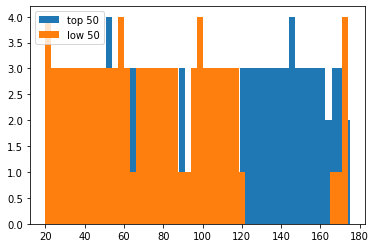

In [38]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [39]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       212
speed                                      12.3
timestamp            2022-10-04 05:08:18.532810
ETA                  2022-10-04 08:23:18.532810
error                    0 days 10:46:16.639778
remained_distance                     65.380753
Name: 153, dtype: object

In [40]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                        95
speed                                      13.1
timestamp            2022-10-01 17:08:38.426222
ETA                  2022-10-03 09:04:38.426222
error                    1 days 10:04:56.746366
remained_distance                    646.812923
Name: 36, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [41]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_20.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 8:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


59


In [42]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [43]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [44]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [45]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,59,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.6448,38.7996,9.4,104.0,2022-09-30 23:00:41.873653,2022-09-30 13:55:21,2022-09-30 01:37:07,under way using engine,999.329431,1248.920210
1,60,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.8027,38.7914,9.4,93.0,2022-09-30 23:30:45.247203,2022-09-30 14:20:30,2022-09-30 02:13:08,under way using engine,986.319121,1232.660467
2,61,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.9141,38.7934,9.2,96.0,2022-10-01 00:01:08.988141,2022-09-30 14:56:28,2022-09-30 02:49:08,under way using engine,977.489504,1223.165075
3,62,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.0021,38.7842,8.7,108.0,2022-10-01 00:30:50.401793,2022-09-30 15:22:00,2022-09-30 03:01:09,under way using engine,970.062241,1222.831812
4,63,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.1093,38.7560,8.2,105.0,2022-10-01 01:00:53.259956,2022-09-30 15:59:42,2022-09-30 03:37:07,under way using engine,960.281513,1227.388613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487
186,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0773,0.1,91.0,2022-10-05 03:40:24.322710,2022-10-04 18:39:15,2022-10-04 06:25:09,moored,11.986756,956.448815


In [46]:
stop_index = check_ATA(sample)

In [47]:
stop_index

176

In [48]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
176,235,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.9017,34.8713,13.6,310.0,2022-10-04 19:09:35.172588,2022-10-04 10:08:33,2022-10-04 10:01:07,under way using engine,13.255617,18.901258
177,236,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8445,34.9367,13.1,330.0,2022-10-04 19:39:37.994914,2022-10-04 10:29:54,2022-10-04 10:37:05,under way using engine,4.312237,5.984210
178,237,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8077,34.9980,8.2,337.0,2022-10-04 20:09:40.578791,2022-10-04 11:02:14,2022-10-04 10:55:07,under way using engine,3.334440,4.261931
179,238,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8012,35.0699,7.2,70.0,2022-10-04 20:39:44.266916,2022-10-04 11:34:12,2022-10-04 11:19:08,under way using engine,11.276009,15.148545
180,239,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0775,0.0,91.0,2022-10-04 21:39:49.189278,2022-10-04 12:39:13,2022-10-04 12:37:09,moored,12.008588,NaN
181,240,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0774,0.1,91.0,2022-10-04 22:09:52.793922,2022-10-04 13:00:17,2022-10-04 01:07:05,moored,11.997866,957.335246
182,241,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8254,35.0771,0.1,91.0,2022-10-04 22:39:55.350680,2022-10-04 13:33:13,2022-10-04 01:31:07,moored,11.965744,954.772172
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487


In [49]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-10-04 19:09:35.172588')

In [50]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [51]:
ddd = sample.loc[20:,:]


In [52]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd.sort_values(by="error")

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
170,229,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0736,34.8129,1.7,165.0,2022-10-04 14:09:06.757291,2022-10-04 04:58:22,2022-10-04 05:07:06,under way using engine,28.998679,136.489950,2022-10-04 18:58:06.757291,2022-10-04 19:09:35.172588,0 days 00:11:28.415297
169,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0605,34.8080,1.2,215.0,2022-10-04 13:39:04.851250,2022-10-04 04:32:53,2022-10-04 04:19:07,under way using engine,28.394939,188.993134,2022-10-04 18:28:04.851250,2022-10-04 19:09:35.172588,0 days 00:41:30.321338
168,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0444,34.8247,7.6,151.0,2022-10-04 13:09:01.327977,2022-10-04 04:06:04,2022-10-04 03:49:05,under way using engine,26.086101,34.224027,2022-10-04 17:58:01.327977,2022-10-04 19:09:35.172588,0 days 01:11:33.844611
167,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0293,34.8297,1.7,133.0,2022-10-04 12:38:58.111665,2022-10-04 03:35:32,2022-10-04 03:25:06,under way using engine,24.662677,116.081414,2022-10-04 17:27:58.111665,2022-10-04 19:09:35.172588,0 days 01:41:37.060923
171,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,147.954666,2022-10-04 21:09:21.070551,2022-10-04 19:09:35.172588,0 days 01:59:45.897963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,96,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,122.7942,37.8360,13.9,108.0,2022-10-01 17:38:01.003407,2022-10-01 08:31:20,2022-10-01 08:19:07,under way using engine,626.191874,908.400694,2022-10-03 07:46:01.003407,2022-10-04 19:09:35.172588,1 days 11:23:34.169181
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-03 07:35:39.986288,2022-10-04 19:09:35.172588,1 days 11:33:55.186300
31,90,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,122.0458,38.1312,12.3,117.0,2022-10-01 14:32:13.543898,2022-10-01 05:26:01,2022-10-01 05:25:10,under way using engine,699.499934,933.935895,2022-10-03 07:34:13.543898,2022-10-04 19:09:35.172588,1 days 11:35:21.628690
25,84,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.3499,38.3959,12.8,105.0,2022-10-01 11:31:52.958583,2022-10-01 02:27:35,2022-10-01 02:25:07,under way using engine,766.971510,1048.257719,2022-10-03 07:26:52.958583,2022-10-04 19:09:35.172588,1 days 11:42:42.214005


In [53]:
ddd['error'].mean()

Timedelta('0 days 18:57:33.386169487')

In [54]:
ddd['error'].max()

Timedelta('1 days 12:12:45.046569')

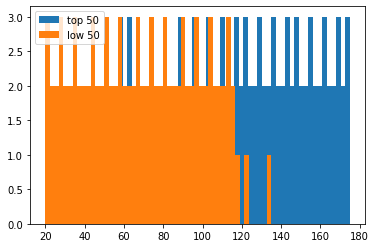

In [55]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [56]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       195
speed                                      13.0
timestamp            2022-10-03 20:07:22.061769
ETA                  2022-10-04 10:11:22.061769
error                    0 days 08:58:13.110819
remained_distance                    249.997451
Name: 136, dtype: object

In [57]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       113
speed                                      12.7
timestamp            2022-10-02 02:03:17.393410
ETA                  2022-10-03 16:11:17.393410
error                    1 days 02:58:17.779178
remained_distance                    450.927014
Name: 54, dtype: object